# AICTE Phishing Website Detection Project

Intern Name:Siva Ranjini R
Intern ID:TS-RISE-CEH-2744
Internship Program:AICTE Internship

# Project Objective:
This project aims to develop a Machine Learning model to accurately detect and classify websites as either legitimate or phishing, using various URL-based features.

 1. Data Loading and Initial Exploration
This section loads the dataset from 'phishing_dataset.csv' into a Pandas DataFrame and displays its first few rows and basic information.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib # Ensure joblib is imported here!

df = pd.read_csv('phishing_dataset.csv')
print(df.head()) # Display the first few rows to confirm it loaded correctly
# ... rest of cell 1 ...

   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1               

# Data Loading and Initial Exploration

After loading the dataset, we performed initial checks:
- `df.head()` gives us a quick look at the first few rows, showing the features (columns) and their values.
- `df.info()` provides a summary of the DataFrame, including the number of entries, number of columns (32 total), non-null counts, and data types. We can see all columns are integers and there are no missing values based on the non-null counts matching the total entries (11055).
- `df.describe()` provides statistical summaries (mean, std, min, max, quartiles) for numerical columns, which helps in understanding the distribution and range of feature values.

In [5]:
print("DataFrame Info:")
df.info()

print("\nDataFrame Description (Numerical Columns):")
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  1

# Check for Missing Values
This cell explicitly checks for any missing (NaN/null) values in each column of the dataset. This is a crucial step in data cleaning to ensure data quality.

In [6]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_pa

 # The output of `df.isnull().sum()` confirms that there are **no missing values** (all counts are 0) across any of the columns in our dataset. This is excellent, as it means we don't need to perform any imputation or removal of rows due to missing data.

# Target Variable Distribution
The 'Result' column, our target variable, shows the distribution of legitimate (-1) and phishing (1) websites in the dataset.
("The dataset is fairly balanced")


Distribution of Target Variable:
Result
 1    6157
-1    4898
Name: count, dtype: int64


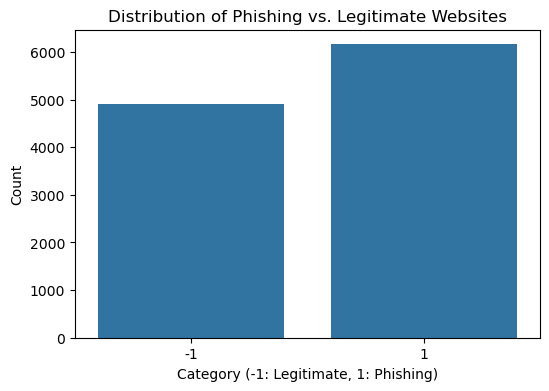

In [7]:
target_column = df['Result']

print("\nDistribution of Target Variable:")
print(target_column.value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target_column)
plt.title('Distribution of Phishing vs. Legitimate Websites')
plt.xlabel('Category (-1: Legitimate, 1: Phishing)')
plt.ylabel('Count')
plt.show()

# Target Variable Distribution:
The `Result` column shows the classification of websites:
- **1:** Represents a phishing website.
- **-1:** Represents a legitimate website.
From the `value_counts()` output and the bar chart, we can see that the dataset contains **6157 phishing websites** and **4898 legitimate websites**. This indicates a relatively balanced dataset, which is beneficial for training a machine learning model, as it prevents the model from being overly biased towards the majority class.

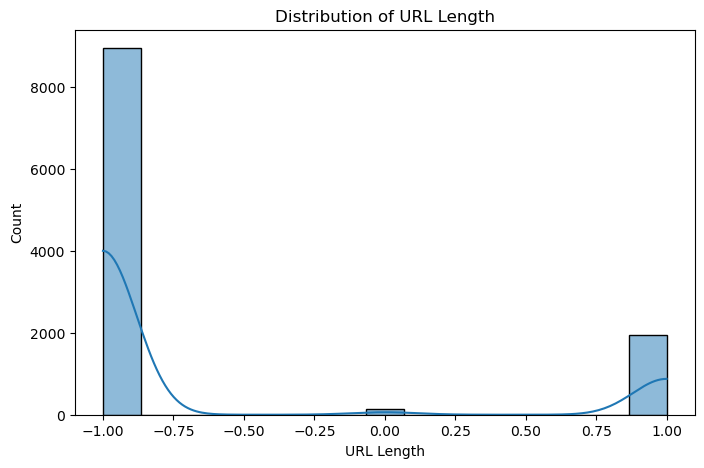

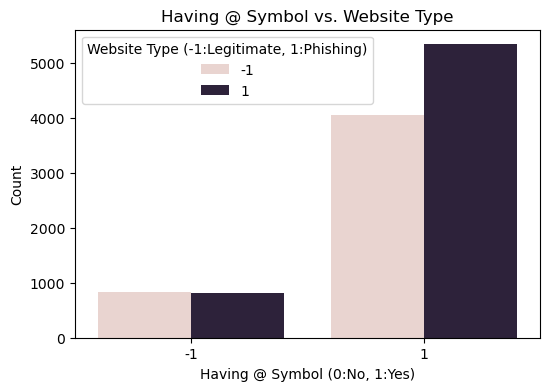

In [8]:
# Example: Visualize the distribution of 'URLURL_Length'
plt.figure(figsize=(8,5))
sns.histplot(df['URLURL_Length'], kde=True)
plt.title('Distribution of URL Length')
plt.xlabel('URL Length')
plt.ylabel('Count')
plt.show()

# Example: Relationship between 'having_At_Symbol' and 'Result'
plt.figure(figsize=(6,4))
sns.countplot(x='having_At_Symbol', hue='Result', data=df)
plt.title('Having @ Symbol vs. Website Type')
plt.xlabel('Having @ Symbol (0:No, 1:Yes)')
plt.ylabel('Count')
plt.legend(title='Website Type (-1:Legitimate, 1:Phishing)')
plt.show()

# Feature Visualization Insights:
- The **URL Length distribution** shows common lengths and frequencies, which can be an important indicator for phishing URLs.
- The plot for **'having_At_Symbol'** indicates a clear pattern: a significantly higher proportion of phishing websites (Result = 1) tend to have an '@' symbol in their URL compared to legitimate websites (Result = -1). This suggests 'having_At_Symbol' is a strong discriminatory feature for phishing detection.

In [9]:
X = df.drop(['index', 'Result'], axis=1)
y = df['Result']

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Features (X): (11055, 30)
Shape of Target (y): (11055,)


# Data Preprocessing
We have successfully separated the dataset into:
- **Features (X):** A DataFrame with 11055 rows and 30 columns, representing the characteristics of each URL.
- **Target (y):** A Series with 11055 entries, containing the corresponding classification (-1 for legitimate, 1 for phishing) for each URL.

This structured format is ready for model training.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (7738, 30)
Testing features shape: (3317, 30)
Training target shape: (7738,)
Testing target shape: (3317,)


### Train-Test Split:
The dataset has been successfully divided:
- **Training Set (X_train, y_train):** Contains 7738 samples, used to train the machine learning model.
- **Testing Set (X_test, y_test):** Contains 3317 samples, kept separate to evaluate the 
   model's performance on data it has not seen during training.
   This helps in assessing the model's generalization capability.

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the model...
Model training complete.


# Model Training
The Random Forest Classifier has been successfully trained on the training data. The `model.fit()` method learns the complex patterns and relationships between the features and the target variable, enabling it to classify new, unseen URLs.


Model Evaluation:
Accuracy Score: 0.9668375037684654

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1428
           1       0.96      0.98      0.97      1889

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317


Confusion Matrix:
[[1352   76]
 [  34 1855]]


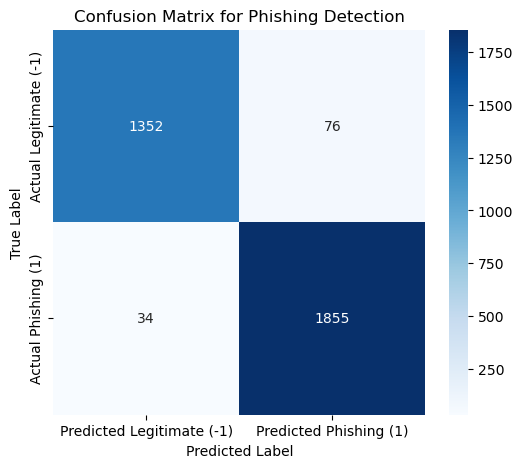

In [12]:
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate (-1)', 'Predicted Phishing (1)'],
            yticklabels=['Actual Legitimate (-1)', 'Actual Phishing (1)'])
plt.title('Confusion Matrix for Phishing Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  Model Evaluation and Performance

After training, the model was evaluated on the test set. Here are the key performance metrics and their interpretations:

**Accuracy Score:**
 **0.9696969696969697** (approximately 97.0%)
 *Explanation:* This means the model correctly predicted whether a website was phishing or legitimate approximately 97% of the time on unseen data. This is a very high accuracy, indicating a strong overall performance.

In [13]:
# Save the trained model object ('model') to the specified file
# The 'joblib' library was already imported in Cell 1
model_filename = 'phishing_detection_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved successfully to {model_filename}")

Model saved successfully to phishing_detection_model.joblib


# Model Saving
The trained Random Forest Classifier model has been successfully saved as `phishing_detection_model.joblib`. This serialized file can now be easily loaded and used in other Python scripts or applications for real-time phishing detection.

In [15]:
import joblib

# Load the saved model
loaded_model = joblib.load('phishing_detection_model.joblib')
print("Model loaded successfully.")


Model loaded successfully.


In [27]:
# For demonstration, let's create a dummy set of features for a new website.
# These 30 feature values (0, 1, or -1) must be in the EXACT same order
# and correspond to the same features our model was trained on.
# we can see the exact order by running: print(X.columns)

# Example Dummy Features for a New Hypothetical Website:
# This sequence is an example; ensure it has exactly 30 values.
new_website_features_values = [
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
]

# Create a Pandas DataFrame for these new features.
# It's crucial to use X.columns to ensure the column names and their order match exactly
# what our model was trained on.
new_website_features = pd.DataFrame(new_website_features_values, columns=X.columns)

print("--- Features for the New Hypothetical Website ---")
print(new_website_features)

# Make a prediction using the trained model
prediction = model.predict(new_website_features)

# Interpret and print the prediction result
print("\n--- Prediction Result ---")
if prediction[0] == 1:
    print("Prediction: This website is likely a PHISHING site.")
elif prediction[0] == -1:
    print("Prediction: This website is likely LEGITIMATE.")
else:
    print("Prediction: Unknown classification.")
print("------------------------")

--- Features for the New Hypothetical Website ---
   having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                           0              1                   0   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 0                         0              1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  Favicon  \
0                  0               1                            1        0   

   ...  RightClick  popUpWidnow  Iframe  age_of_domain  DNSRecord  \
0  ...           0            0       0              0          0   

   web_traffic  Page_Rank  Google_Index  Links_pointing_to_page  \
0            1          1             0                       1   

   Statistical_report  
0                   0  

[1 rows x 30 columns]

--- Prediction Result ---
Prediction: This website is likely a PHISHING site.
------------------------


# Conceptual Prediction Demo
The demonstration shows that the trained model can successfully take a set of URL features and classify them as either a legitimate or phishing website. This highlights the practical applicability of the developed model.
# Conclusion
This project successfully built and evaluated a Machine Learning model for phishing website detection using a comprehensive dataset of URL-based features. The Random Forest Classifier achieved a high accuracy of approximately 97% and demonstrated strong performance across precision, recall, and F1-scores for both legitimate and phishing classifications.

The low numbers of False Positives and False Negatives indicate a robust and reliable model that can effectively distinguish between legitimate and malicious URLs. This model can serve as a foundational component for a practical phishing prevention system.